# Polynomial Regression
- [notebook](https://www.kaggle.com/code/mukeshmanral/polynomial-regression-basic/notebook)

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data\archive.zip
./data\archive\total-electricity-consumption-us.csv


In [4]:
#%pip install scikit-learn

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [7]:
data = pd.read_csv('./data/archive/total-electricity-consumption-us.csv')
data.head()

,Year,Consumption
0,1920,57125
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651


In [ ]:
data.shape, data.isnull().sum() #checking missing values

((51, 2),
 Year           0
 Consumption    0
 dtype: int64)

In [ ]:
size = len(data.index)
index = range(0, size,5) #cust idx
train = data[~data.index.isin(index)] # ~ tilda includes all idx except the mentioned
test = data[data.index.isin(index)]

In [12]:
train.shape, test.shape, train.head(), test.head()

((40, 2),
 (11, 2),
    Year  Consumption
 1  1921        53656
 2  1922        61816
 3  1923        72113
 4  1924        76651
 6  1926        95164,
     Year  Consumption
 0   1920        57125
 5   1925        85513
 10  1930       115783
 15  1935       120124
 20  1940       181706)

Why Reshape?
Many machine learning algorithms in Python (especially those in scikit-learn) expect the input features (X) to be a 2D array-like structure where:
Each row represents a single sample or data point.
Each column represents a feature or attribute of that sample.v

In [13]:
#converting train to a two dimensional array, as required by learning algorithm
x_train = train.Year.values.reshape(-1,1) #makin it 2D
y_train = train.Consumption

x_test = test.Year.values.reshape(-1,1)
y_test = test.Consumption

In [14]:
r2_train = []
r2_test = []
degrees = [1,2,3]
#linear reg vs quad vs cubic

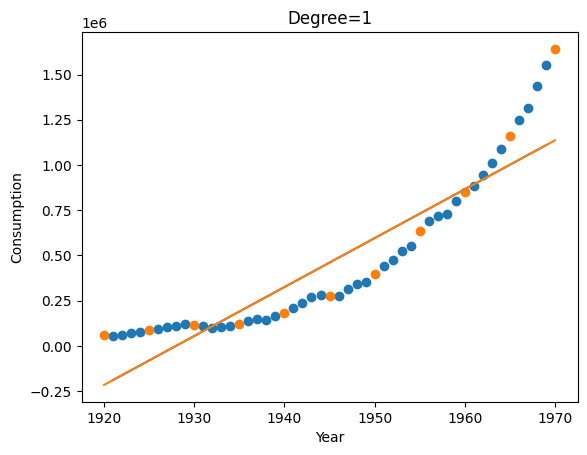

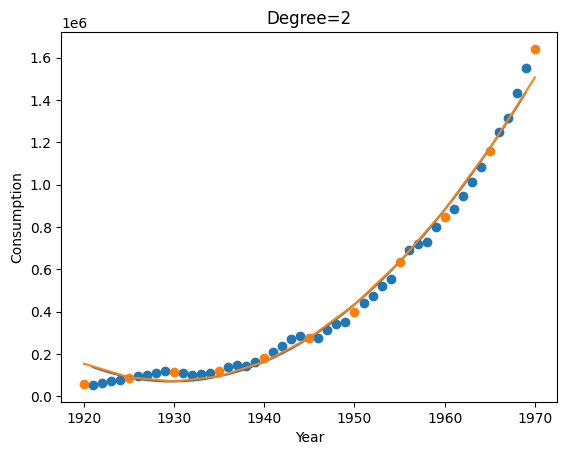

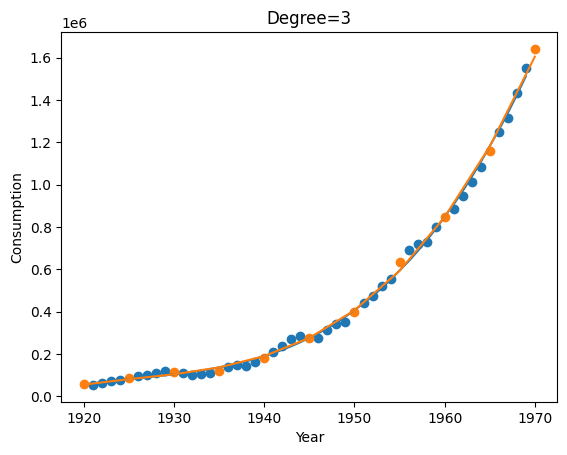

In [15]:
for degree in degrees:
    #using pipeline to compare multiple perf
    pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=degree)), ('model', LinearRegression())])
    pipeline.fit(x_train, y_train)

    y_pred_train = pipeline.predict(x_train)
    r2_train.append(metrics.r2_score(y_train, y_pred_train))

    y_pred_test = pipeline.predict(x_test)
    r2_test.append(metrics.r2_score(y_test, y_pred_test))

    #plotting
    fig, ax = plt.subplots()
    ax.set_title('Degree=' + str(degree))
    ax.set_xlabel("Year")
    ax.set_ylabel('Consumption')

    ax.scatter(x_train, y_train)
    ax.plot(x_train, y_pred_train)

    ax.scatter(x_test, y_test)
    ax.plot(x_test, y_pred_test)

    plt.show()


In [16]:
print(degrees, '\n')
print(r2_train, '\n')
print(r2_test, '\n')

[1, 2, 3] 

[0.8423747402176137, 0.9908896744553399, 0.9979789884229612] 

[0.816517046382681, 0.9876080502675171, 0.998490019372777] 

